In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
#we'll use these helper functions to generate a polynomial basis on the feature data matrices X

def poly_basis_single_sample(x, k):
    #this function will help us quickly generate a polynomial basis
    #k is the largest polynomial degree the basis runs to
    out = []
    for i in range(k+1):
        #notice that first value of i will be 0, so the bias term is included
        out.append(np.power(x, i))
    return(np.asarray(out))

#this one is not required for this assignment but can be used; we will use in the next assignment
def poly_basis_multi_sample(X, k):
    out = []
    for sample_row in range(X.shape[0]):
        sample = X[sample_row]
        #poly basis returns an m feature x k power matrix, we need to vectorize it by using .flatten()
        poly = np.asarray(poly_basis_single_sample(sample, k)).flatten() 
        out.append(poly)
    return(np.asarray(out))

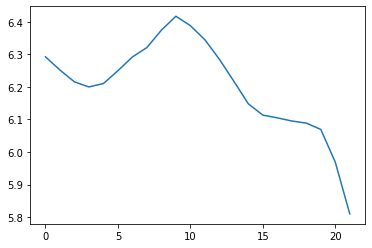

(22, 32)
(22,)


In [4]:
#import the training data
data = np.loadtxt("homework_3_data_ex_train.txt")

#in this example there are 5 feature dimensions over 24 hours
X_train_raw = data[:,0:4]

#in order to use 2 hours at a time, we need to pair two hour rows together, one hour at a time, passing each
#hour sample through the polynomial basis function with a chosen degree:
poly_degree = 3
X_train = []
for i in range(24 - 2):  #24 hours minus the order
    #get the individual sample for each time step you need, pass it through the polynomial basis function, vectorize
    t_0 = poly_basis_single_sample(X_train_raw[i,:], poly_degree).flatten()
    t_1 = poly_basis_single_sample(X_train_raw[i+1,:], poly_degree).flatten()
    X_train.append(np.concatenate((t_0, t_1)))
    
X_train = np.asarray(X_train)

#the last column is the output p_{t+1} we need to learn
#in order to save the data file, the Y column is 0-padded in the first two values, so we start from the third element
Y_train = data[:,5][2:]

plt.plot(Y_train)
plt.show()

#notice Y_train is only 22 hours long, since the model we'll train in the example is order two, we need the first
#and second hour of the day in order to predict the third hour, otherwise we'd need additional data from the
#previous day; to keep things simple we'll restrict ourselves to 24 hour windows
print(X_train.shape)
print(Y_train.shape)

In [5]:
#similarly we'll load the test data
#import the training data
data_test = np.loadtxt("homework_3_data_ex_test.txt")

X_test_raw = data_test[:,0:4]

poly_degree = 3
X_test = []
for i in range(24 - 2): 
    t_0 = poly_basis_single_sample(X_test_raw[i,:], poly_degree).flatten()
    t_1 = poly_basis_single_sample(X_test_raw[i+1,:], poly_degree).flatten()
    X_test.append(np.concatenate((t_0, t_1)))
    
X_test = np.asarray(X_test)

Y_test = data_test[:,5][2:]


Now we'll use LASSO to fit a polynomial basis to a time series model of order 2, and polynomial basis with degree 3

In [6]:
lasso_regressor = linear_model.Lasso(alpha=0.001, fit_intercept=False, tol=0.01, max_iter=10000)

#this fits the outputs Y to the polynomial basis of inputs in the range -2 to 2
lasso_regressor.fit(X_train, Y_train)

#these are the weights the model learns
w = lasso_regressor.coef_

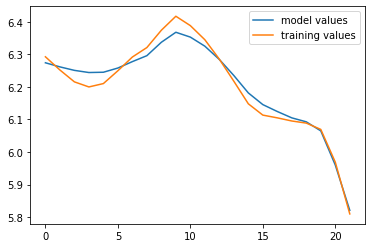

In [7]:
#here we plot our training data and model.

plt.plot(X_train.dot(w), label="model values")   #our model
plt.plot(Y_train, label="training values")   #our training data
plt.legend()
plt.show()

### Problem 1

In the above example we've split our data into a train and test set. Use the model $w$ we learned on the test data. X_test is reformatted so that each row is full sample, $x_{t}$ and $x_{t-1}$  How does the model perform on the test data? Plot the test data, the model predictions, and the [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error).

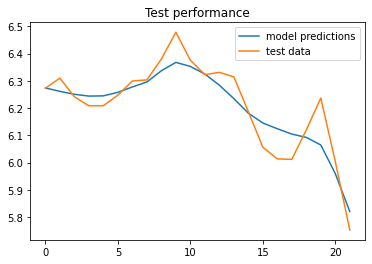

MAE:  0.049340974570973396


In [10]:
plt.title("Test performance")
plt.plot(X_test.dot(w), label="model predictions")   #our model
plt.plot(Y_test, label="test data")   #test data
plt.legend()
plt.show()

print("MAE: ", np.mean(np.abs(X_test.dot(w) - Y_test)))

### Problem 2

We're going to look at what happens when we overfit a model. 

Pass the training and test data through the basis function as above. Train a model $w$ with the training set using LASSO and the parameters given below. In one plot, plot the model applied to the training data and training output values. In another plot, draw the model on the test data and test output values. In your own words, describe what happens.

In [33]:
#use these parameters for LASSO and the polynomial basis function

poly_degree = 9  #higher than our previous problem
alpha = 0.000001  #much smaller than our previous problem


In [34]:
data_train = np.loadtxt("homework_3_data_ex_train.txt")

X_train_raw = data_train[:,0:4]
Y_train_raw = data_train[:,5][2:]

data_test = np.loadtxt("homework_3_data_ex_test.txt")

X_test_raw = data_test[:,0:4]
Y_test_raw = data_test[:,5][2:]

#pass each set data set X through the basis function above with the appropriate polynomial degree

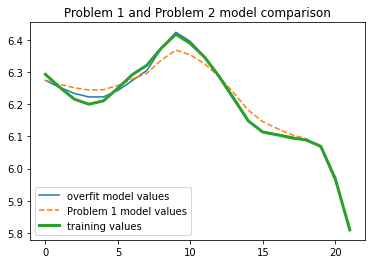

MAE:  0.021487734049601744
Overfit MAE:  0.006658763839297946


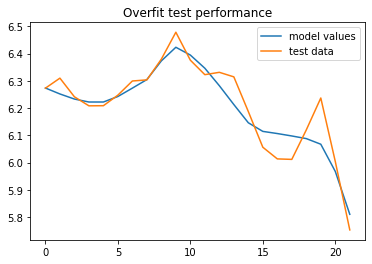

MAE:  0.04338365001122306


In [35]:
X_train_overfit = []
for i in range(24 - 2): 
    t_0 = poly_basis_single_sample(X_train_raw[i,:], poly_degree).flatten()
    t_1 = poly_basis_single_sample(X_train_raw[i+1,:], poly_degree).flatten()
    X_train_overfit.append(np.concatenate((t_0, t_1)))
    
X_train_overfit = np.asarray(X_train_overfit)

X_test_overfit = []
for i in range(24 - 2): 
    t_0 = poly_basis_single_sample(X_test_raw[i,:], poly_degree).flatten()
    t_1 = poly_basis_single_sample(X_test_raw[i+1,:], poly_degree).flatten()
    X_test_overfit.append(np.concatenate((t_0, t_1)))
    
X_test_overfit = np.asarray(X_test_overfit)

lasso_regressor_overfit = linear_model.Lasso(alpha=0.000001, fit_intercept=False, tol=0.01, max_iter=10000)

#this fits the outputs Y to the polynomial basis of inputs in the range -2 to 2
lasso_regressor_overfit.fit(X_train_overfit, Y_train)

#these are the weights the model learns
w_overfit = lasso_regressor_overfit.coef_

plt.title("Problem 1 and Problem 2 model comparison")
plt.plot(X_train_overfit.dot(w_overfit), label="overfit model values")
plt.plot(X_train.dot(w), "--", label="Problem 1 model values")
plt.plot(Y_train, lw=3, label="training values")   #our training data
plt.legend()
plt.show()

mae = np.mean(np.abs(X_train.dot(w) - Y_train))
print("MAE: ", mae)

mae_overfit = np.mean(np.abs(X_train_overfit.dot(w_overfit) - Y_train))
print("Overfit MAE: ", mae_overfit)

plt.figure()
plt.title("Overfit test performance")
plt.plot(X_test_overfit.dot(w_overfit), label="model values")   #our model
plt.plot(Y_test, label="test data")   #test data
plt.legend()
plt.show()

print("MAE: ", np.mean(np.abs(X_test_overfit.dot(w_overfit) - Y_test)))

The performance on test data is unchanged, even though we increased the polynomial degree which reduced the training error significantly. There are more than twice as many non-zero values in the overfit model, but a significantly less complicated model achieves the same MAE.

In [37]:
print("number of nonzero elements: ", len(np.nonzero(w)[0]))
print("number of nonzero elements with overfitting: ", len(np.nonzero(w_overfit)[0]))

number of nonzero elements:  24
number of nonzero elements with overfitting:  66


### Problem 3

Now we're going to overfit in another way. We're going to increase the order of the model. We happen to know that the true data was generated with an autoregressive equation of order 3. Suppose we didn't know, and we guessed much higher without doing any sort of auto-correlation tests.

Train a model of order 7. You'll only have 24 - 7 values to predict, since you need the first 7 values of x to predict the first y. Adjust the for-loop in problem 1 to include 7 consecutive values, instead of 2. Just like problem 2, do one plot with the model on the training data and training output values, and a second plot with the model on the test data and the test output values.

In [43]:
#use these parameters for LASSO and the polynomial basis function

poly_degree = 3
alpha = 0.001

In [44]:
data_train = np.loadtxt("homework_3_data_ex_train.txt")

X_train_raw_prob_3 = data_train[:,0:4]
Y_train_raw_prob_3 = data_train[:,5][7:]  #we're picking up y from 7 onwards

data_test = np.loadtxt("homework_3_data_ex_test.txt")

X_test_raw_prob_3 = data_test[:,0:4]
Y_test_raw_prob_3 = data_test[:,5][7:]

#pass each set data set X through the basis function above with the appropriate polynomial degree

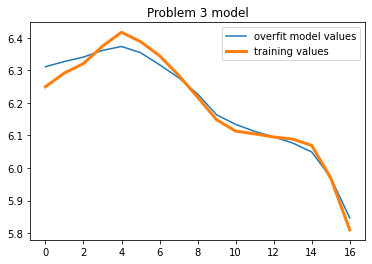

Overfit MAE:  0.021583905777588515


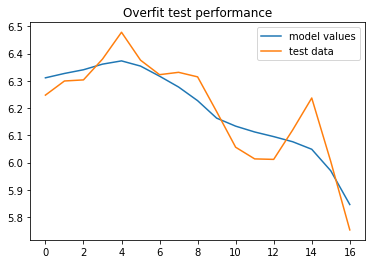

MAE:  0.06249199880728963


In [45]:
X_train_overfit = []
for i in range(24 - 7): 
    t_0 = poly_basis_single_sample(X_train_raw[i,:], poly_degree).flatten()
    t_1 = poly_basis_single_sample(X_train_raw[i+1,:], poly_degree).flatten()
    t_2 = poly_basis_single_sample(X_train_raw[i+2,:], poly_degree).flatten()
    t_3 = poly_basis_single_sample(X_train_raw[i+3,:], poly_degree).flatten()
    t_4 = poly_basis_single_sample(X_train_raw[i+4,:], poly_degree).flatten()
    t_5 = poly_basis_single_sample(X_train_raw[i+5,:], poly_degree).flatten()
    t_6 = poly_basis_single_sample(X_train_raw[i+6,:], poly_degree).flatten()
    X_train_overfit.append(np.concatenate((t_0, t_1, t_2, t_3, t_4, t_5, t_6)))
    
X_train_overfit = np.asarray(X_train_overfit)

X_test_overfit = []
for i in range(24 - 7): 
    t_0 = poly_basis_single_sample(X_test_raw[i,:], poly_degree).flatten()
    t_1 = poly_basis_single_sample(X_test_raw[i+1,:], poly_degree).flatten()
    t_2 = poly_basis_single_sample(X_test_raw[i+2,:], poly_degree).flatten()
    t_3 = poly_basis_single_sample(X_test_raw[i+3,:], poly_degree).flatten()
    t_4 = poly_basis_single_sample(X_test_raw[i+4,:], poly_degree).flatten()
    t_5 = poly_basis_single_sample(X_test_raw[i+5,:], poly_degree).flatten()
    t_6 = poly_basis_single_sample(X_test_raw[i+6,:], poly_degree).flatten()
    X_test_overfit.append(np.concatenate((t_0, t_1, t_2, t_3, t_4, t_5, t_6)))
    
X_test_overfit = np.asarray(X_test_overfit)

Y_train_raw_prob_3 = data[:,5][7:]
Y_test_raw_prob_3 = data_test[:,5][7:]

lasso_regressor_overfit = linear_model.Lasso(alpha=0.001, fit_intercept=False, tol=0.01, max_iter=10000)

#this fits the outputs Y to the polynomial basis of inputs in the range -2 to 2
lasso_regressor_overfit.fit(X_train_overfit, Y_train_raw_prob_3)

#these are the weights the model learns
w_overfit = lasso_regressor_overfit.coef_

plt.title("Problem 3 model")
plt.plot(X_train_overfit.dot(w_overfit), label="overfit model values")
plt.plot(Y_train_raw_prob_3, lw=3, label="training values")   #our training data
plt.legend()
plt.show()

mae_overfit = np.mean(np.abs(X_train_overfit.dot(w_overfit) - Y_train_raw_prob_3))
print("Overfit MAE: ", mae_overfit)

plt.figure()
plt.title("Overfit test performance")
plt.plot(X_test_overfit.dot(w_overfit), label="model values")   #our model
plt.plot(Y_test_raw_prob_3, label="test data")   #test data
plt.legend()
plt.show()

print("MAE: ", np.mean(np.abs(X_test_overfit.dot(w_overfit) - Y_test_raw_prob_3)))

The model with too high an order is very insensitive to changes in test data, as it incorporates noise from multiple previous values.